In [ ]:
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import files
upload = files.upload()

Saving META (2).csv to META (2).csv


In [ ]:
d_train = pd.read_csv('META (2).csv')
d_t = pd.read_csv('META (2).csv')
print(d_train)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-06-21   31.670000   32.500000   31.510000   31.840000   31.840000   
1     2012-06-22   32.410000   33.450001   32.060001   33.049999   33.049999   
2     2012-06-25   32.860001   33.020000   31.549999   32.060001   32.060001   
3     2012-06-26   32.689999   33.439999   32.500000   33.099998   33.099998   
4     2012-06-27   32.459999   32.900002   31.900000   32.230000   32.230000   
...          ...         ...         ...         ...         ...         ...   
2510  2022-06-13  170.589996  172.580002  164.029999  164.259995  164.259995   
2511  2022-06-14  166.029999  166.750000  161.360001  163.729996  163.729996   
2512  2022-06-15  167.199997  172.160004  163.979996  169.350006  169.350006   
2513  2022-06-16  163.720001  165.080002  159.610001  160.869995  160.869995   
2514  2022-06-17  161.679993  165.899994  159.899994  163.740005  163.740005   

        Volume  
0     21875300  
1    

In [ ]:
t_set = d_train.iloc[:, 1:2].values

print(t_set.shape)

(2515, 1)


In [ ]:
#Preprocessing using Scaling the Input data 
sc = MinMaxScaler(feature_range = (0, 1))
t_set_scaled = sc.fit_transform(t_set)
print(t_set_scaled)

[[0.03737624]
 [0.03941144]
 [0.04064907]
 ...
 [0.41012101]
 [0.40055007]
 [0.39493948]]


In [ ]:
train_x = []
train_y = []
for i in range(60, 2515):
  train_x.append(t_set_scaled[i-60:i, 0])
  train_y.append(t_set_scaled[i, 0])
train_x = np.array(train_x)
train_y = np.array(train_y)
print(train_x.shape)

(2455, 60)


In [ ]:
print(train_y.shape)

(2455,)


In [ ]:
#reshaping the train_x
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
train_x.shape

(2455, 60, 1)

In [ ]:
Model = Sequential()

Model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_x.shape[1], 1)))
Model.add(Dropout(0.25))

Model.add(LSTM(units = 50, return_sequences = True))
Model.add(Dropout(0.25))

Model.add(LSTM(units = 50, return_sequences = True))
Model.add(Dropout(0.25))

Model.add(LSTM(units = 50, return_sequences=True))
Model.add(Dropout(0.25))

Model.add(LSTM(units = 50, return_sequences = True))
Model.add(Dropout(0.25))

Model.add(LSTM(units = 50))
Model.add(Dropout(0.25))

Model.add(Dense(units = 1))

In [ ]:
Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
Model.fit(train_x, train_y, epochs = 50, batch_size = 32)

Epoch 1/50
77/77 [==============================] - 11s 21ms/step - loss: 0.0011
Epoch 2/50
77/77 [==============================] - 2s 20ms/step - loss: 0.0011
Epoch 3/50
77/77 [==============================] - 2s 20ms/step - loss: 8.2833e-04
Epoch 4/50
77/77 [==============================] - 2s 21ms/step - loss: 8.3720e-04
Epoch 5/50
77/77 [==============================] - 2s 20ms/step - loss: 8.9654e-04
Epoch 6/50
77/77 [==============================] - 2s 20ms/step - loss: 9.7071e-04
Epoch 7/50
77/77 [==============================] - 2s 20ms/step - loss: 8.8125e-04
Epoch 8/50
77/77 [==============================] - 2s 21ms/step - loss: 8.6943e-04
Epoch 9/50
77/77 [==============================] - 2s 20ms/step - loss: 9.8783e-04
Epoch 10/50
77/77 [==============================] - 2s 20ms/step - loss: 9.7038e-04
Epoch 11/50
77/77 [==============================] - 2s 20ms/step - loss: 9.1673e-04
Epoch 12/50
77/77 [==============================] - 2s 20ms/step - loss: 9.3157e

In [ ]:
test = pd.read_csv("META (2).csv")
ac_stock_pr = test.iloc[:, 1:2].values

df = pd.concat((d_train['Open'], test['Open']), axis = 0)
df.shape
df[0]

0    31.67
0    31.67
Name: Open, dtype: float64

In [ ]:
inp = df[len(df) - len(test) - 60:].values

inp_r = inp.reshape(-1, 1)

inp_sc = sc.transform(inp_r)
print(inp_sc.shape)

test_x = []
for x in range(60, 2515):
  test_x.append(inp_sc[x-60:x])
test_x = np.array(test_x)

(2575, 1)


In [ ]:
print(test_x) 
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

[[[0.54158417]
  [0.55673817]
  [0.56119364]
  ...
  [0.41012101]
  [0.40055007]
  [0.39493948]]

 [[0.55673817]
  [0.56119364]
  [0.57202973]
  ...
  [0.40055007]
  [0.39493948]
  [0.03737624]]

 [[0.56119364]
  [0.57202973]
  [0.57984051]
  ...
  [0.39493948]
  [0.03737624]
  [0.03941144]]

 ...

 [[0.86831682]
  [0.85814085]
  [0.88220575]
  ...
  [0.48575358]
  [0.5050055 ]
  [0.51875688]]

 [[0.85814085]
  [0.88220575]
  [0.90360289]
  ...
  [0.5050055 ]
  [0.51875688]
  [0.54020903]]

 [[0.88220575]
  [0.90360289]
  [0.90437297]
  ...
  [0.51875688]
  [0.54020903]
  [0.53160066]]]


In [ ]:
prediction = Model.predict(test_x)
prediction = sc.inverse_transform(prediction)
print(prediction)

[[161.38712]
 [126.53304]
 [ 95.01052]
 ...
 [198.16252]
 [204.82343]
 [206.53322]]


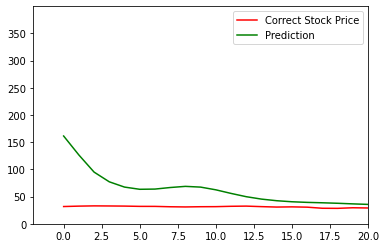

In [ ]:
plt.plot(ac_stock_pr, color = 'red' ,label = 'Correct Stock Price')
plt.plot(prediction, color = 'green', label = 'Prediction')
plt.xlim(-2, 20)
plt.legend()

In [ ]:
print(ac_stock_pr.shape)
test_y = ac_stock_pr[60:]
print(test_y)
score = Model.evaluate(test_x, test_y, verbose = 0)

print(score) 

(2515, 1)
[[ 22.67    ]
 [ 21.6     ]
 [ 21.99    ]
 ...
 [167.199997]
 [163.720001]
 [161.679993]]
30769.90625


In [ ]:
def Acc_(A, B):
  acc = 0
  x = 0
  for i in range(len(A)):
    x = x + 1
    acc = acc + (abs(A[i] - B[i]))/A[i]
  return (acc)/x

In [ ]:
print(Acc_(prediction[:20], ac_stock_pr[:20]))#Accuracy

[0.44595032]
